In [33]:
from netCDF4 import Dataset
import numpy as np

import matplotlib.pyplot as plt

In [2]:
precip_raw=Dataset(r'./precip.mon.mean.nc','r')
air_raw=Dataset(r'./air.mon.mean.nc','r')

In [3]:
precip_rawdata=precip_raw.variables['precip'][:]
air_rawdata=air_raw.variables['air'][:]

In [4]:
air_lat_data=air_raw.variables['lat'][:]
print(air_lat_data),len(air_lat_data)#우상단부터 시작

[ 90.   87.5  85.   82.5  80.   77.5  75.   72.5  70.   67.5  65.   62.5
  60.   57.5  55.   52.5  50.   47.5  45.   42.5  40.   37.5  35.   32.5
  30.   27.5  25.   22.5  20.   17.5  15.   12.5  10.    7.5   5.    2.5
   0.   -2.5  -5.   -7.5 -10.  -12.5 -15.  -17.5 -20.  -22.5 -25.  -27.5
 -30.  -32.5 -35.  -37.5 -40.  -42.5 -45.  -47.5 -50.  -52.5 -55.  -57.5
 -60.  -62.5 -65.  -67.5 -70.  -72.5 -75.  -77.5 -80.  -82.5 -85.  -87.5
 -90. ]


(None, 73)

In [5]:
air_lon_data=air_raw.variables['lon'][:]
print(air_lon_data),len(air_lon_data)

[  0.    2.5   5.    7.5  10.   12.5  15.   17.5  20.   22.5  25.   27.5
  30.   32.5  35.   37.5  40.   42.5  45.   47.5  50.   52.5  55.   57.5
  60.   62.5  65.   67.5  70.   72.5  75.   77.5  80.   82.5  85.   87.5
  90.   92.5  95.   97.5 100.  102.5 105.  107.5 110.  112.5 115.  117.5
 120.  122.5 125.  127.5 130.  132.5 135.  137.5 140.  142.5 145.  147.5
 150.  152.5 155.  157.5 160.  162.5 165.  167.5 170.  172.5 175.  177.5
 180.  182.5 185.  187.5 190.  192.5 195.  197.5 200.  202.5 205.  207.5
 210.  212.5 215.  217.5 220.  222.5 225.  227.5 230.  232.5 235.  237.5
 240.  242.5 245.  247.5 250.  252.5 255.  257.5 260.  262.5 265.  267.5
 270.  272.5 275.  277.5 280.  282.5 285.  287.5 290.  292.5 295.  297.5
 300.  302.5 305.  307.5 310.  312.5 315.  317.5 320.  322.5 325.  327.5
 330.  332.5 335.  337.5 340.  342.5 345.  347.5 350.  352.5 355.  357.5]


(None, 144)

In [6]:
len(air_raw.variables['air'][:])

877

preprocessing

In [7]:
all_data=[]
for i in range(73):
    for j in range(144):
        line=[]
        for k in range(877):
            line.append(air_rawdata[k][i][j])
        all_data.append(line)

finding optimal k by elbow method

In [8]:
def elbow(X):
    sse=[]
    for i in range(1,10):
        km=KMeans(n_clusters=i)
        km.fit(X)
        sse.append(km.inertia_)
    plt.plot(range(1,15),sse,'o-')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

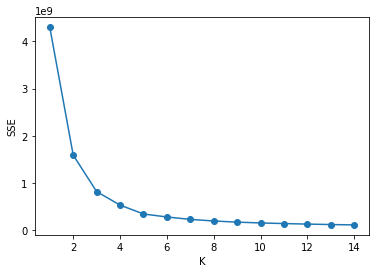

In [9]:
elbow(all_data)

kmeans clustering

In [34]:
from sklearn.cluster import KMeans
KMeans=KMeans(n_clusters=5)
KMeans.fit(all_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
KMeans.labels_.shape

(10512,)

visualizing

In [36]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\yunju\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from mpl_toolkits.basemap import Basemap
map = Basemap()

C:\Users\yunju\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


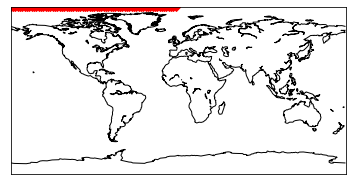

In [44]:
map.drawcoastlines()

for i in range(1):#위도
    for j in range(72):#경도
        a, b = map(air_lon_data[j]-180,air_lat_data[i])
        map.plot(a, b, marker='D',color='red')
plt.show()

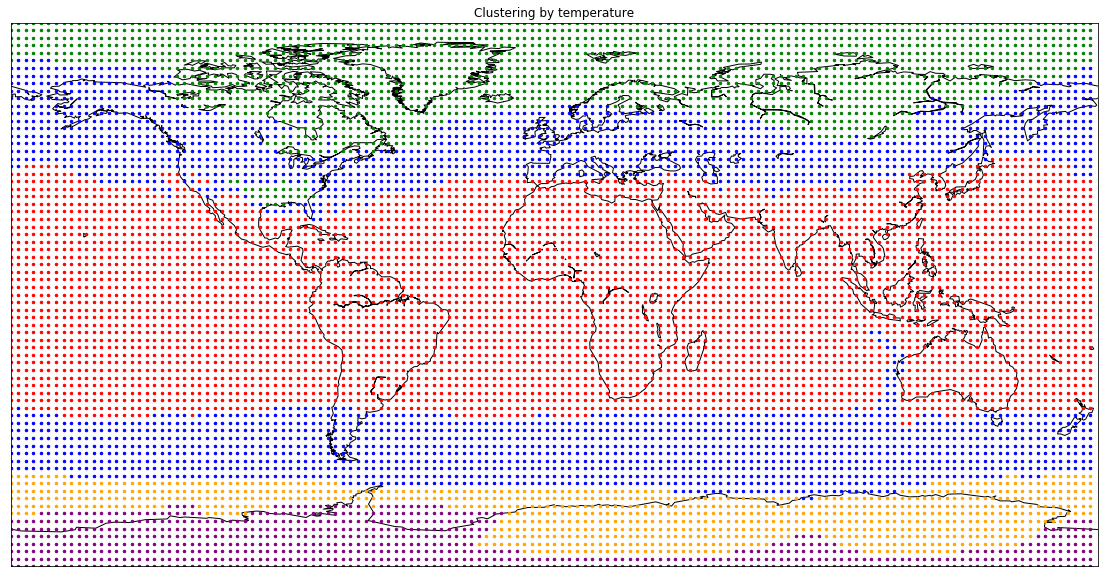

In [48]:
plt.figure(figsize=(22,10))
map.drawcoastlines()

for i in range(73):#위도
    for j in range(144):#경도
        if KMeans.labels_[144*i+j]==0:
            a, b = map(air_lon_data[j]-180,air_lat_data[i])
            map.plot(a, b, marker='.',color='red',markersize=5)
        if KMeans.labels_[144*i+j]==1:
            a, b = map(air_lon_data[j]-180,air_lat_data[i])
            map.plot(a, b, marker='.',color='orange',markersize=5)
        if KMeans.labels_[144*i+j]==2:
            a, b = map(air_lon_data[j]-180,air_lat_data[i])
            map.plot(a, b, marker='.',color='purple',markersize=5)            
        if KMeans.labels_[144*i+j]==3:
            a, b = map(air_lon_data[j]-180,air_lat_data[i])
            map.plot(a, b, marker='.',color='green',markersize=5)            
        if KMeans.labels_[144*i+j]==4:
            a, b = map(air_lon_data[j]-180,air_lat_data[i])
            map.plot(a, b, marker='.',color='blue',markersize=5)
plt.title('Clustering by temperature')
plt.show()

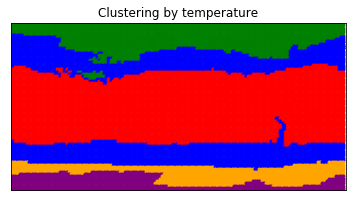

In [49]:
map.drawcoastlines()

for i in range(73):#위도
    for j in range(144):#경도
        if KMeans.labels_[144*i+j]==0:
            a, b = map(air_lon_data[j]-180,air_lat_data[i])
            map.plot(a, b, marker='.',color='red')
        if KMeans.labels_[144*i+j]==1:
            a, b = map(air_lon_data[j]-180,air_lat_data[i])
            map.plot(a, b, marker='.',color='orange')
        if KMeans.labels_[144*i+j]==2:
            a, b = map(air_lon_data[j]-180,air_lat_data[i])
            map.plot(a, b, marker='.',color='purple')            
        if KMeans.labels_[144*i+j]==3:
            a, b = map(air_lon_data[j]-180,air_lat_data[i])
            map.plot(a, b, marker='.',color='green')            
        if KMeans.labels_[144*i+j]==4:
            a, b = map(air_lon_data[j]-180,air_lat_data[i])
            map.plot(a, b, marker='.',color='blue')
plt.title('Clustering by temperature')
plt.show()